# Філософська хвилина

## 1. Чи можно вважати мене машиною, якщо в магазині я приймаю рішення за допомогою if/else?

![alt text](https://i.pinimg.com/originals/30/a1/2a/30a12a836d1e3b0b3e6d8e831f2e05cc.jpg)

## 2. Може весь ML це if/else і лектор сам собі придумав всі ці алгоритми?

![alt text](https://miro.medium.com/v2/resize:fit:1400/0*UGfqDrqdmzso8Gdq)

# Decision Tree

Дерева рішень - це методи машинного навчання, які використовуються для класифікації та регресії. Вони є гнучким та інтерпретованим способом вирішення проблем, що включає прогнозування цін на нерухомість, класифікацію споживачів та визначення шляху для реклами.

Дерево рішень - це алгоритм машинного навчання, який використовує деревоподібну структуру для розбиття набору даних на менші підмножини. Кожен вузол у дереві представляє один з атрибутів/ознак даних, за якими можна розділити набір даних на дві або більше підмножини.

## Основні терміни

У деревах рішень можуть бути різні типи вузлів, кожен з яких виконує певну роль у розбитті набору даних на менші підмножини. Ось основні типи вузлів дерева рішень, котрі ми згадували вище:

- **кореневий вузол** (**ROOT NODE**) - це перший вузол дерева рішень, він є початковим вузлом для обходу дерева. Кореневий вузол містить умову розбиття набору даних на дві або більше підмножини, також його просто називають коренем дерева рішень (root);

- **внутрішній вузол**(**DECISION NODE**) - це вузол, який не є ні кореневим, ні листовим. Внутрішній вузол також містить умову розбиття, яка використовується для подальшого розділення набору даних на підмножини;

- **листовий вузол**(**LEAF NODE**) - це вузол, який не містить умови розбиття і є кінцевим вузлом у дереві. Листовий вузол містить прогнозоване значення для вхідних даних. Якщо дерево рішень використовується для класифікації, листові вузли містять класифікаційні мітки, які відповідають певному класу. Якщо дерево рішень використовується для регресії, листові вузли містять числові значення, які представляють прогнозоване значення. Також їх просто називають листками дерева (leaves).

![alt text](https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg)

![alt text](https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png)

## Як це працює? Критерії розділення.

Класифікація.


Для задачі класифікації існує кілька популярних критеріїв розділення в контексті дерев рішень. Ось кілька з них:

- Ентропія (Entropy): Ентропія вимірює невизначеність чи розподіл неоднорідності класів в наборі даних. Мета - максимізувати інформацію при кожному вузлі.
$$\text{Entropy}(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)$$

- Індекс Джині (Gini Index): Цей критерій вимірює ймовірність того, що випадково обраний елемент буде неправильно класифікований, якщо вибрати два випадкові елементи з набору даних. Індекс Джині варіюється від 0 до 1, і нуль вказує на ідеальну чистоту.

$$\text{Gini}(S) = 1 - \sum_{i=1}^{c} p_i^2$$

- Помилкова класифікація (Misclassification Error): Це простий критерій, який вимірює частку невірно класифікованих прикладів в вузлі.
$$ \text{Misclassification Error}(S) = 1 - \max(p_1, p_2, ..., p_c)$$

- Інформаційний приріст (Information Gain): Це вимірює, наскільки інформативною є певна ознака. Вибирається ознака з найвищим приростом інформації для розділення
$$\text{Information Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \cdot \text{Entropy}(S_v)$$


де $S$ - множина даних,

$c$ - кількість класів,

$p_i$ -  ймовірність належності до класу $i$,

$A$ - ознака,

$Values(A)$ - всі можливі значення ознаки $A$,

$S_v$- підмножина даних, де ознака $A$ має значення $v$.

Ідеальні показники для них це $0$. А для $IG$ коли дорівнює $Entropy(S)$.

![alt text](https://miro.medium.com/v2/resize:fit:602/1*xK4AQDBpHub_OGeRwbDRtg.jpeg)

Регресія.
У задачі регресії для визначення критерію розділення при побудові дерева рішень використовують різні метрики для оцінки якості розділення вузла. Ось кілька з найпоширеніших критеріїв розділення в контексті регресії:
1. MSE
2. MAE
3. Huber Loss

## Практика

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score


pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<Axes: xlabel='Attrition', ylabel='count'>

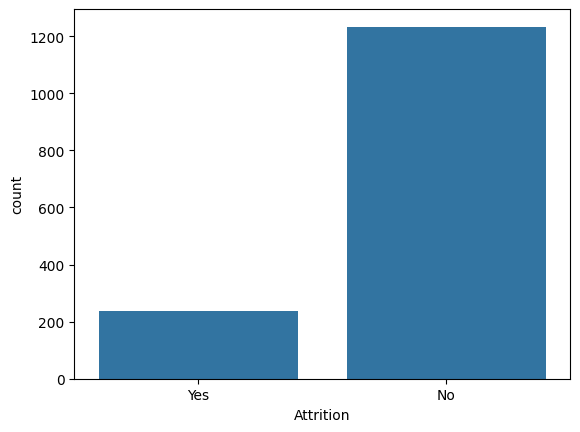

In [4]:
sns.countplot(x='Attrition', data=df)

In [5]:
bad_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
display(df[['Over18']].describe())
display(df[['EmployeeCount', 'EmployeeNumber', 'StandardHours']].describe())
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

,Over18
count,1470
unique,1
top,Y
freq,1470


,EmployeeCount,EmployeeNumber,StandardHours
count,1470.0,1470.000000,1470.0
mean,1.0,1024.865306,80.0
std,0.0,602.024335,0.0
min,1.0,1.000000,80.0
25%,1.0,491.250000,80.0
50%,1.0,1020.500000,80.0
75%,1.0,1555.750000,80.0
max,1.0,2068.000000,80.0


In [6]:
label = LabelEncoder()
df['Attrition'] = label.fit_transform(df['Attrition'])
y = df['Attrition']
df.drop(['Attrition'], axis="columns", inplace=True)

In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [8]:
num_cols = []
cat_cols = []
# bin_cols = []
# date_cols = []

In [9]:
cat_cols = df.dtypes[df.dtypes == 'object'].index.values
df[cat_cols].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1043,961,606,882,326,673,1054


In [10]:
num_cols = df.dtypes[df.dtypes == 'int64'].index.values
df[num_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y,
                                                    test_size=0.3,
                                                    stratify = y,
                                                    random_state=42)

In [12]:
# Eda + FE + FS + ...
# ...

In [13]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])

In [25]:
pipeline.set_params(classifier__max_depth=10,#  10
                    classifier__min_samples_split=80,
                    )
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test ROC_AUC: {roc_auc:.2f}')

Test Accuracy: 0.78
Test ROC_AUC: 0.70


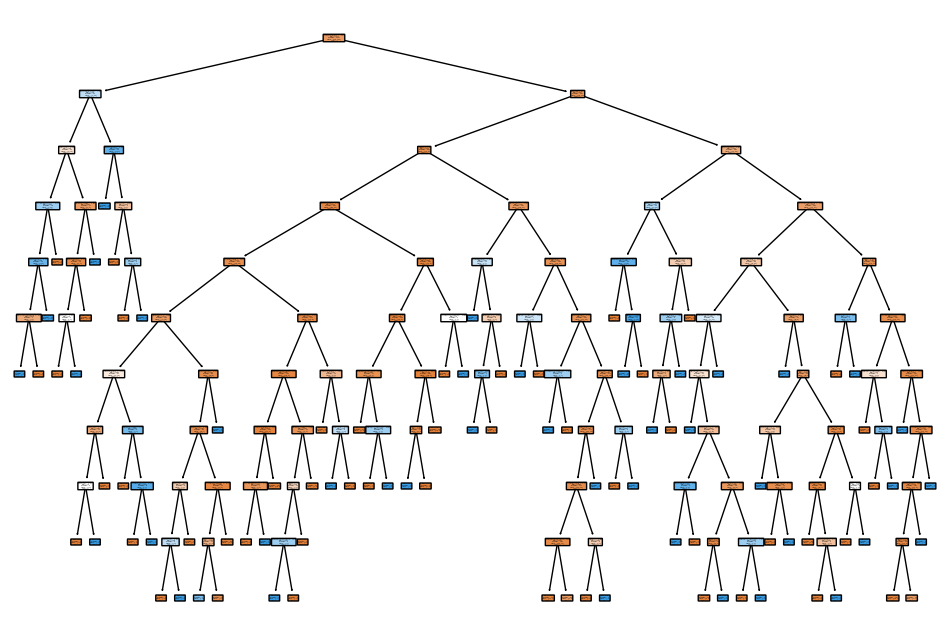

In [20]:
plt.figure(figsize=(12, 8))
plot_tree(pipeline.named_steps['classifier'],
          feature_names=num_cols.tolist() + cat_cols.tolist(),
          class_names=['0', '1'],
          filled=True,
          rounded=True)
plt.show()

In [21]:
param_dist = {
    'classifier__max_depth': [None, 3, 5, 8],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
    }

random_search = RandomizedSearchCV(pipeline,
                                   param_distributions=param_dist,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   cv=3,
                                   random_state=42)

random_search.fit(X_train, y_train)
# Виведемо найкращі параметри та результати
print("Best Parameters: ", random_search.best_params_)
print("Best Scoring: {:.2f}".format(random_search.best_score_))

Best Parameters:  {'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 5}
Best Scoring: 0.70


In [22]:
model = random_search.best_estimator_

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test ROC_AUC: {roc_auc:.2f}')

Test Accuracy: 0.82
Test ROC_AUC: 0.60


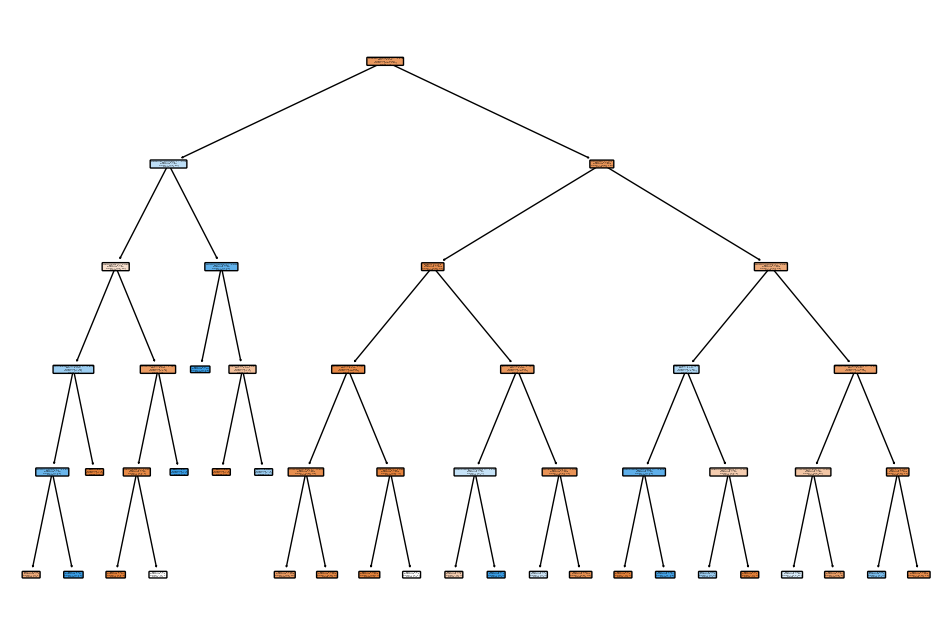

In [23]:
plt.figure(figsize=(12, 8))
plot_tree(model.named_steps['classifier'],
          feature_names=num_cols.tolist() + cat_cols.tolist(),
          class_names=['0', '1'],
          filled=True,
          rounded=True)
plt.show()

# Ensembles methods


Скільки важить бик?

https://www.ukrinform.ua/rubric-world/3236280-rozvidka-majbutnogo-akij-zi-scenariiv-spravditsa.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

## RANDOM FOREST


Random Forest (Випадковий ліс) - це ансамбль моделей, який базується на концепції багатокласового багаторівневого бутстрепу та агрегації (багатокласового бутстрепу та агрегації). Зазвичай використовуються рішучі дерева як базові моделі, і вони об'єднуються для отримання більш точного та стійкого прогнозу.

Основні ідеї та властивості Random Forest:

1. Багатокласовий бутстреп (Bagging): Метод випадкового лісу використовує багатокласовий бутстреп, тобто для кожної моделі у випадковому лісі вибирається випадковий піднабір навчальних даних (з повторенням). Це дозволяє зберегти випадковість та різноманітність між моделями.

2. Випадковий вибір ознак (Feature Randomness): При побудові кожного дерева випадковий ліс обирає випадковий піднабір ознак для розділення на кожному рівні дерева. Це дозволяє моделям бути менш скоропалитими до конкретних ознак та робить їх більш стійкими.

3. Багато моделей (Ensemble): Random Forest об'єднує результати кількох дерев у випадковому лісі. Для класифікаційних задач, він використовує голосування більшості, і для задач регресії - середнє значення.

4. Стійкість до перенавчання: Random Forest відомий своєю здатністю уникати перенавчання. Його стійкість до перенавчання забезпечується за рахунок випадкового вибору піднабору даних та випадкового вибору ознак для кожного дерева.

5. Оцінка важливості ознак: Random Forest надає можливість оцінювати важливість кожної ознаки в моделі. Це може бути використано для відбору ознак або для отримання інсайтів щодо того, які ознаки найбільше впливають на прогноз.

![alt text](https://media5.datahacker.rs/2022/08/26.jpg)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

param_dict_rf = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(pipeline_rf,
                                   param_distributions=param_dict_rf,
                                   n_iter=10,
                                   scoring='roc_auc',
                                   cv=3,
                                   random_state=42)

random_search_rf.fit(X_train, y_train)
# Виведемо найкращі параметри та результати
print("Best Parameters: ", random_search_rf.best_params_)
print("Best Scoring: {:.2f}".format(random_search_rf.best_score_))

Best Parameters:  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 30}
Best Scoring: 0.81


In [28]:
model_rf = random_search_rf.best_estimator_
# Зробимо прогнози на тестовому наборі
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])

print(f'Test Accuracy: {accuracy_rf:.2f}')
print(f'Test ROC_AUC: {roc_auc_rf:.2f}')

Test Accuracy: 0.83
Test ROC_AUC: 0.75


## Boosting

![alt text](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Fc6373145-2c09-4cd7-ad57-833e01cb1f0a_4488x6300.png)

In [29]:
# pip install xgboost==2.0.3
import xgboost
xgboost.__version__

'2.0.3'

In [30]:
from xgboost import XGBClassifier
import warnings
warnings.simplefilter("ignore")

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier(random_state=42))])

param_dict_xgb= {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__learning_rate': [0.1, 1, 10]
}

random_search_xgb = RandomizedSearchCV(pipeline_xgb,
                                   param_distributions=param_dict_xgb,
                                   n_iter=10,
                                   scoring='roc_auc',
                                   cv=3,
                                   random_state=42)

random_search_xgb.fit(X_train, y_train)
# Виведемо найкращі параметри та результати
print("Best Parameters: ", random_search_xgb.best_params_)
print("Best Scoring: {:.2f}".format(random_search_xgb.best_score_))

Best Parameters:  {'classifier__n_estimators': 100, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__learning_rate': 1}
Best Scoring: 0.80


In [31]:
model_xgb = random_search_xgb.best_estimator_
# Зробимо прогнози на тестовому наборі
y_pred_xgb = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb[:, 1])

print(f'Test Accuracy: {accuracy_xgb:.2f}')
print(f'Test ROC_AUC: {roc_auc_xgb:.2f}')

Test Accuracy: 0.85
Test ROC_AUC: 0.74


## Meta Estimators

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier

![alt text](https://www.researchgate.net/publication/363541655/figure/fig1/AS:11431281084426528@1663182121378/Ensemble-learners-Soft-voting-and-stacking.ppm)

![alt text](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*ZRDSwbncsfAkT-2aWqUkQA.png)

### Add literature
1. https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/
2. https://medium.com/@mygreatlearning/everything-you-need-to-know-about-ensemble-learning-eed79a704a45
3. https://medium.com/@imamitsingh/voting-classifiers-in-machine-learning-a532935fe592
4. https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840
5. https://medium.com/@datasciencewizards/understanding-the-adaboost-algorithm-2e9344d83d9b

!!!6!!!.https://pruchka.medium.com/intro-to-model-stacking-in-python-70814e95d7a1